# Практическая работа 6

In [79]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sts

## Задание 1
Загрузить данные из файла “ECDCCases.csv”.

In [80]:
df = pd.read_csv("data/06_practice/ECDCCases.csv")

## Задание 2
Проверить в данных наличие пропущенных значений. Вывести количество пропущенных значений в процентах. Удалить два признака, в которых больше всех пропущенных значений. Для оставшихся признаков обработать пропуски: для категориального признака использовать заполнение значением по умолчанию (например, «other»), для числового признака использовать заполнение медианным значением. Показать, что пропусков больше в данных нет.

Проверить в данных наличие пропущенных значений. Вывести количество пропущенных значений в процентах.

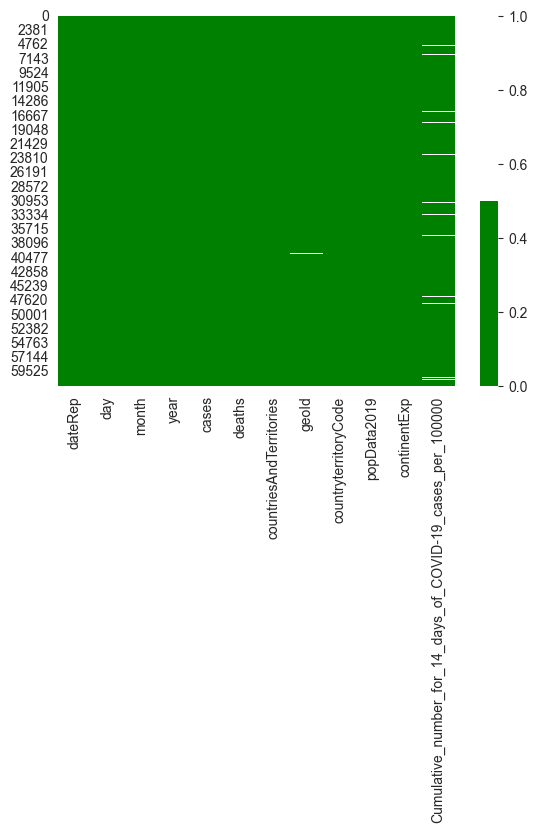

In [81]:
colors = ['green', 'white'] # white is null
sns.heatmap(df.isna(), cmap=sns.color_palette(colors))
plt.show()

In [82]:
for column in df.columns:
    missing = np.mean(df[column].isna()*100)
    print(f"{column}: {round(missing,3)}%")

dateRep: 0.0%
day: 0.0%
month: 0.0%
year: 0.0%
cases: 0.0%
deaths: 0.0%
countriesAndTerritories: 0.0%
geoId: 0.444%
countryterritoryCode: 0.199%
popData2019: 0.199%
continentExp: 0.0%
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000: 4.651%


Удалить два признака, в которых больше всех пропущенных значений - Больше всего пропущенных значений - у geoID, Cumulative

In [83]:
df = df.drop(columns=['geoId', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])

Посмотрим колонки с нулевыми значениями

In [84]:
with_null_columns = df.columns[df.isna().any()].tolist()
for column in with_null_columns:
    print(column)
    print("-"*60)
    print(f"info: {df[column].info()}")
    print("-"*60)

countryterritoryCode
------------------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 61904 entries, 0 to 61903
Series name: countryterritoryCode
Non-Null Count  Dtype 
--------------  ----- 
61781 non-null  object
dtypes: object(1)
memory usage: 483.8+ KB
info: None
------------------------------------------------------------
popData2019
------------------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 61904 entries, 0 to 61903
Series name: popData2019
Non-Null Count  Dtype  
--------------  -----  
61781 non-null  float64
dtypes: float64(1)
memory usage: 483.8 KB
info: None
------------------------------------------------------------


countryterritoryCode - категориальный, popData2019 - числовой

Для оставшихся признаков обработать пропуски: для категориального признака использовать заполнение значением по умолчанию (например, «other»), для числового признака использовать заполнение медианным значением.

In [85]:
for i in range(len(df['countryterritoryCode'])):
    if not pd.notna(df['countryterritoryCode'][i]):
        df['countryterritoryCode'][i] = 'other'
    if not pd.notna(df['popData2019'][i]):
        df['popData2019'][i] = df['popData2019'].median()

df.isnull().sum()

C:\Users\orono\AppData\Local\Temp\ipykernel_21308\1031924531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countryterritoryCode'][i] = 'other'
C:\Users\orono\AppData\Local\Temp\ipykernel_21308\1031924531.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['popData2019'][i] = df['popData2019'].median()
C:\Users\orono\AppData\Local\Temp\ipykernel_21308\1031924531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countr

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
countryterritoryCode       0
popData2019                0
continentExp               0
dtype: int64

## Задание 3
Посмотреть статистику по данным, используя describe(). Сделать выводы о том, какие признаки содержат выбросы. Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.

In [86]:
df.describe()

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61904 entries, 0 to 61903
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  61904 non-null  object 
 1   day                      61904 non-null  int64  
 2   month                    61904 non-null  int64  
 3   year                     61904 non-null  int64  
 4   cases                    61904 non-null  int64  
 5   deaths                   61904 non-null  int64  
 6   countriesAndTerritories  61904 non-null  object 
 7   countryterritoryCode     61904 non-null  object 
 8   popData2019              61904 non-null  float64
 9   continentExp             61904 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 4.7+ MB


Таким образом, мы удалили все дубликаты.
Теперь определим, какие колонки числовые, а какие - категориальные.

In [88]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])
print(numeric_data.shape)
print(categorical_data.shape)

(61904, 6)
(61904, 4)


Посмотрим на выбросы и зададим фильтры.

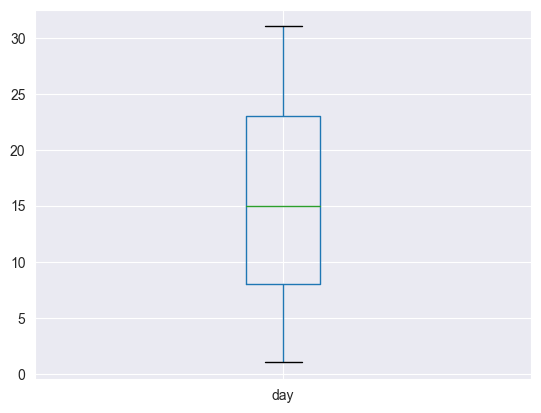

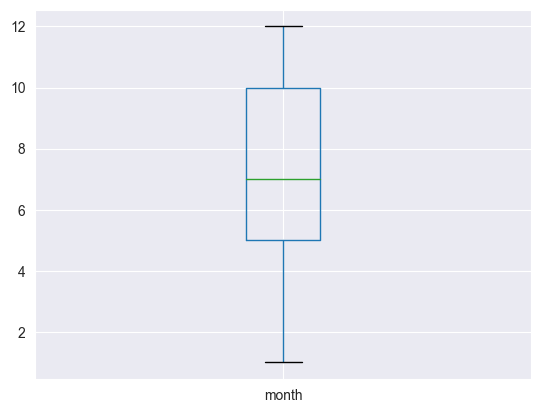

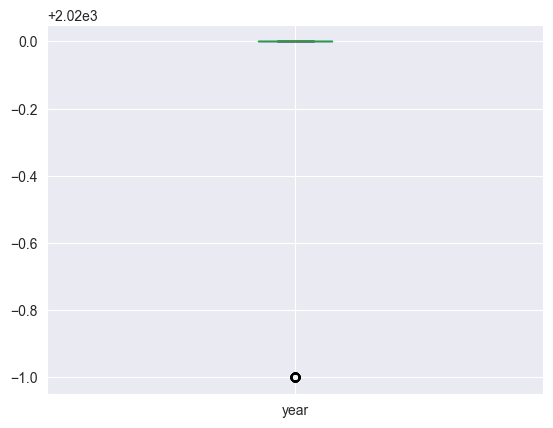

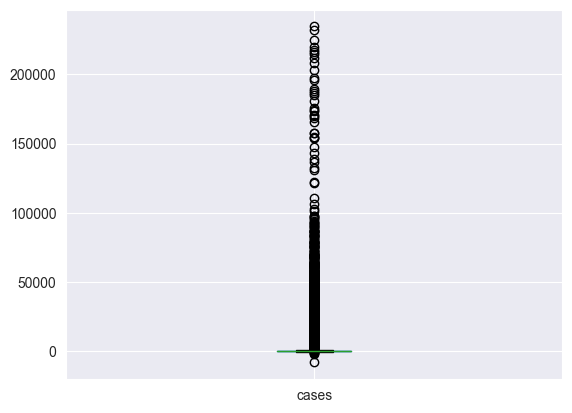

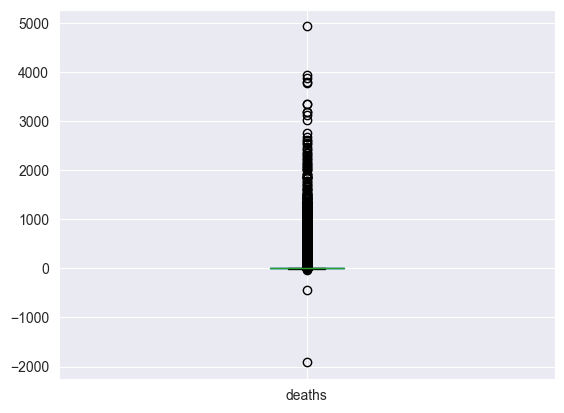

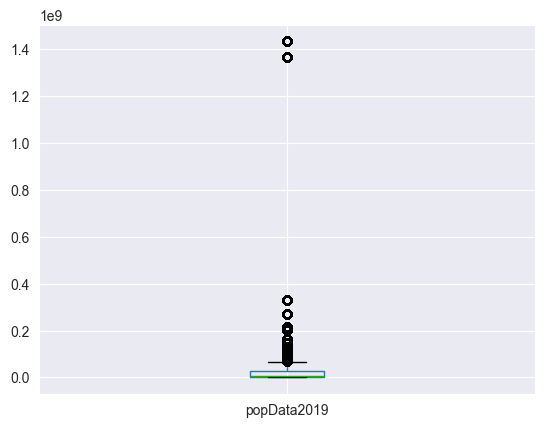

In [89]:
for column in list(numeric_data.columns):
    df.boxplot(column)
    plt.show()

Делаем вывод, что данные содержат много невалидных значений, применим следующие фильтры:
* popdata2019: <1.2*1e9
* deaths: > 0
* cases: > 0
* year: > 0
* day: < 32

In [90]:
filtered_df = df.loc[(df.popData2019 < 1.2*10**9) & (df.deaths > 0) & (df.cases > 0) & (df.year > 0) & (df.day < 32)]
filtered_df = filtered_df.reset_index(drop=True)

## Задание 4
Найти дублирование данных. Удалить дубликаты.

In [91]:
filtered_df = filtered_df.drop_duplicates().reset_index(drop=True)
filtered_df.shape

(24502, 10)

## Задание 5
Загрузить данные из файла “ bmi.csv”. Взять оттуда две выборки. Одна выборка – это индекс массы тела людей c региона northwest, вторая выборка – это индекс массы тела людей с региона southwest. Сравнить средние значения этих выборок, используя t-критерий Стьюдента. Предварительно проверить выборки на нормальность (критерий Шопиро-Уилка) и на гомогенность дисперсии (критерий Бартлетта).

In [92]:
df_bmi = pd.read_csv("data/06_practice/bmi.csv")

df_bmi_north = df_bmi.loc[(df_bmi.region == 'northwest')]
df_bmi_south = df_bmi.loc[(df_bmi.region == 'southwest')]

Проверка распределений на нормальность (критерий Шапиро-Уилка) с использованием scipy.stats:

In [93]:
res_south = sts.shapiro(df_bmi_south.bmi)
res_north = sts.shapiro(df_bmi_north.bmi)
print(f"south:{res_south}\nnorth:{res_north}")

south:ShapiroResult(statistic=0.9949268698692322, pvalue=0.3629520535469055)
north:ShapiroResult(statistic=0.9954646825790405, pvalue=0.4655335247516632)


Тест дает p-значение выше 0.05, следовательно, выборки имеют нормальное распределение.

Проверка гомогенности дисперсии.

Критерий Бартлетта – статистический критерий, позволяющий проверять равенство дисперсий нескольких (двух и более) выборок. Нулевая гипотеза предполагает, что рассматриваемые выборки получены из генеральных совокупностей, обладающих одинаковыми дисперсиями. Так же предполагается, что выборки распределены нормально.

In [94]:
barlett_both = sts.bartlett(df_bmi_south.bmi, df_bmi_north.bmi)
barlett_both

BartlettResult(statistic=3.4000745256459286, pvalue=0.06519347353581818)

p-уровень превышает 0.05, следовательно, дисперсии выборок примерно одинаковы. Можем переходить к t критерию Стьюдента.

In [95]:
sts.ttest_ind(df_bmi_south.bmi, df_bmi_north.bmi)

Ttest_indResult(statistic=3.2844171500398582, pvalue=0.001076958496307695)

p-значение намного ниже 0.05, следовательно нулевая гипотеза отвергается, выборки принадлежат к разным генеральным совокупностям и их средние значения различны.

## Задание 6
Кубик бросили 600 раз, получили следующие результаты.
С помощью критерия Хи-квадрат проверить, является ли полученное распределение равномерным. Использовать функцию scipy.stats.chisquare().

In [96]:
attemps = 600
data = [[1,97], [2,98], [3,109], [4,95], [5,97], [6,104]]
throws = pd.DataFrame(data=data, columns=['Points', 'Observed'])
throws['Expected'] = 100
throws

,Points,Observed,Expected
0,1,97,100
1,2,98,100
2,3,109,100
3,4,95,100
4,5,97,100
5,6,104,100


In [97]:
sts.chisquare(throws['Observed'], throws['Expected'])

Power_divergenceResult(statistic=1.44, pvalue=0.9198882077437889)

В таком случае pvalue оказывается гораздо больше, чем 0,05. Исходя из этого мы видим, что распределение становится равномерным и не даёт повод сомневаться в достоверности игральной кости

## Задание 7
С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми.
Создать датафрейм, используя следующий код.
Использовать функцию scipy.stats.chi2_contingency().
Влияет ли семейное положение на занятость?

In [98]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
                     'Гражданский брак': [80,22,20,35,6,4],
                     'Не состоит в отношениях': [35,44,35,6,8,22]})

data.index = ['Полный рабочий день',
              'Частичная занятость',
              'Временно не работает',
              'На домохозяйстве',
              'На пенсии',
              'Учёба']

sts.chi2_contingency(data)

(122.29654948595365,
 1.7291616900960234e-21,
 10,
 array([[74.664, 68.136, 61.2  ],
        [30.378, 27.722, 24.9  ],
        [24.156, 22.044, 19.8  ],
        [30.744, 28.056, 25.2  ],
        [13.176, 12.024, 10.8  ],
        [ 9.882,  9.018,  8.1  ]]))

Чем ниже p-значение, тем больше отклонение нулевой гипотезы и выше ожидаемая значимость результата. То есть в данном случае, зависимость есть. (значение p очень мало)